# Exploratory Data Analysis & Feature Engineering
**Author: Jaclyn Dwyer**

**Project Goal**: To help Kaiser Permanente determine how to identify areas that need higher level NICUs, the goal of this project is to predict the percentage of low birth weight (LBW) births in California census tracts based off their population characteristics and environmental health hazards.

## Overview

Exploratory data analysis is used in order to further analyze the data and look for possible information that may be helpful in predicting LBW percentages. Statistial tests are run in order to determine if there is a statistical difference between categories. A p-value less than 0.05 determines if a statistical difference is present. Additionally, potentially useful features are engineered in order to obtain the best predictions possible. 

In [1]:
#import libraries
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.lines as mlines

In [2]:
#read in data
df18 = pd.read_csv('data/merged/df18')

#drop Unamed
df18.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

## California Counties

An overview look of the California counties the census tracts belong to is explored to get an idea of how many counties there are and how many census tracts belong to each county. 

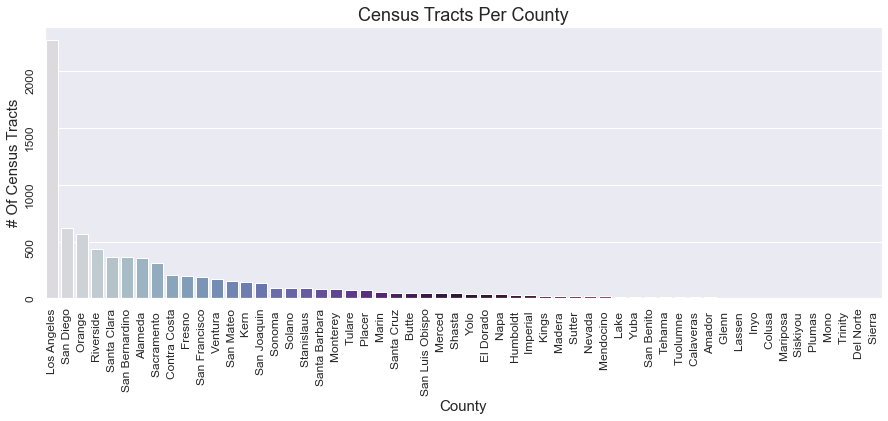

In [74]:
#plot graph
x = list(df18['california_county'].value_counts().index)
y = list(df18['california_county'].value_counts().values)

f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.barplot(x=x,y=y, palette = 'twilight')
bx.axes.set_title("Census Tracts Per County",fontsize=18)
bx.set_xlabel("County",fontsize=15)
bx.set_ylabel("# Of Census Tracts",fontsize=15)
bx.tick_params(labelsize=12)
bx.tick_params(labelsize=12, rotation = 90)

A boxplot of LBW perentages per California counties is created in order to get a visualization of values per county.

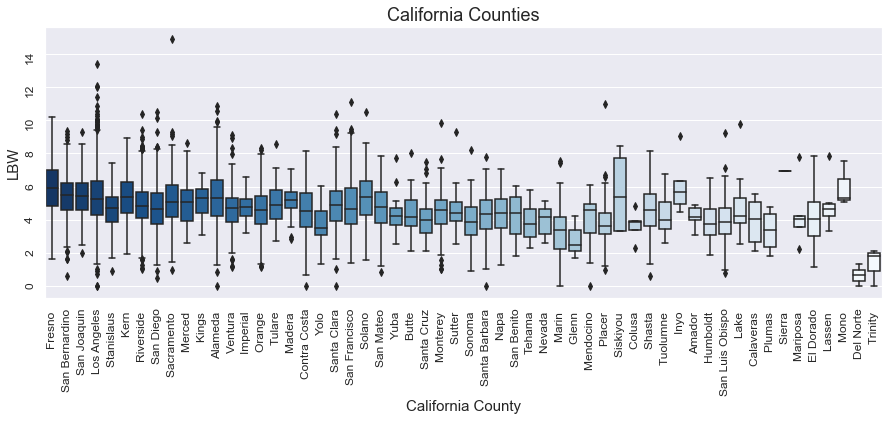

In [76]:
#plot graph
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.boxplot(x=df18['california_county'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("California Counties",fontsize=18)
bx.set_xlabel("California County",fontsize=15)
bx.set_ylabel("LBW",fontsize=15)
bx.tick_params(labelsize=12, rotation = 90)

Del Norte and Trinity appear to be the counties that have the census tracts with the lowested LBW % overall. However, these two counties also had very little to one census tracts.

## Environmental Health Hazards Columns

Individual columns related to environmental health hazards are explored and analyzed, especially those shown to be linked with low birth weights.

### Air Quality (PM 2.5)

The column representing particulate matter is further explored as particulate matter exposure during pregnancy has been associated with LBWs in newborns [(Study).](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1913584/) Particulate matter (PM) includes substances such as organic chemicals, dust, allergens, and metals, which make up mixture of aerosolized solid and liquid particles. Sources of particulate matter can include cars, trucks, industrial processes, wood burning, or other combustion activity. PM 2.5 indicates particulate matter with a diameter of 2.5 which have a particular effect on heart and lung conditions. 

In [6]:
df18['pm2_5'].describe()

count    7812.000000
mean       10.417266
std         2.569632
min         1.651081
25%         8.697944
50%        10.370000
75%        12.050000
max        19.600000
Name: pm2_5, dtype: float64

**Statistical Tests**

In [7]:
#break into three groups
pm_1 = df18[df18['pm2_5']  <= 10.370000]['lbw']
pm_2 = df18[(df18['pm2_5'] > 10.370000) & (df18['pm2_5'] <= 12.050000)]['lbw']
pm_3 = df18[df18['pm2_5'] > 12.050000]['lbw']

In [8]:
#check statistical difference between first and second
stats.ttest_ind(pm_1, pm_2)

Ttest_indResult(statistic=-10.788408306708014, pvalue=6.668237213731389e-27)

In [9]:
#check statistical difference between second and third
stats.ttest_ind(pm_2, pm_3)

Ttest_indResult(statistic=-4.827549875944836, pvalue=1.4375376836221967e-06)

In [10]:
#check statistical difference between first and third

stats.ttest_ind(pm_1, pm_3)

Ttest_indResult(statistic=-14.5913913790202, pvalue=2.403310142059333e-47)

A statistical difference is found between all three groups. These groups are added to the data and explored with visualizations below.

In [11]:
#add groups
conditions = [(df18['pm2_5']  <= 10.370000),
             ((df18['pm2_5'] > 10.370000) & (df18['pm2_5'] <= 12.050000)), 
             (df18['pm2_5'] > 12.050000)]

choice = [('bottom'), ('middle'), ('top')]

df18['pm_breakdown'] = np.select(conditions, choice)

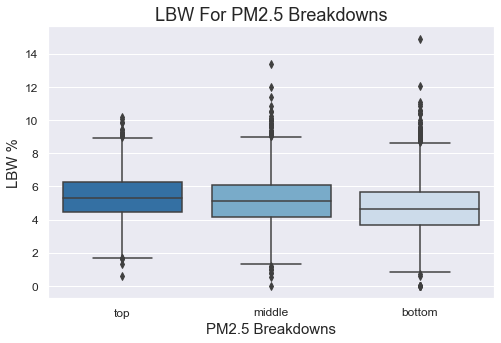

In [79]:
#plot graph
f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.boxplot(x=df18['pm_breakdown'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("LBW For PM2.5 Breakdowns",fontsize=18)
bx.set_xlabel("PM2.5 Breakdowns",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

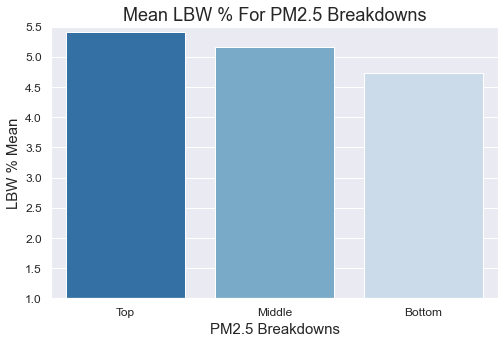

In [80]:
#plot graph
x = ['Top', 'Middle', 'Bottom']
y = [pm_3.mean(), pm_2.mean(), pm_1.mean()]

f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.barplot(x=x,y=y, palette = 'Blues_r')
bx.axes.set_title("Mean LBW % For PM2.5 Breakdowns",fontsize=18)
bx.set_xlabel("PM2.5 Breakdowns",fontsize=15)
bx.set_ylabel("LBW % Mean",fontsize=15)
bx.tick_params(labelsize=12)
bx.set(ylim=(1, 5.5));

The higher amount of PM 2.5 the higher the median and mean LBW percentages for those census tracts are. 
This seems to indicate that the higher a census tracts' particulate matter of 2.5 values are the higher the LBW percentages.

### Traffic

The column representing traffic denisty is further explored as low birth weight has been show to be linked with exposure to air pollutants from vehicle emissions [(Study).](https://pubmed.ncbi.nlm.nih.gov/22586068/) Traffic is known to be a big source of air pollution, especially in urban area where traffic makes up more that 50% of particulate emissions. Vehicle exhaust contains a big amount of toxic chemicals in addition to partaking in the formation of photochemical smog.

In [14]:
df18['traffic'].describe()

count     7812.000000
mean       950.723573
std        909.073818
min         22.410000
25%        450.160000
50%        708.000000
75%       1197.412500
max      45687.870000
Name: traffic, dtype: float64

**Statistical Tests**

In [15]:
#create groups
t_1 = df18[df18['traffic'] <= 450.160000]['lbw']
t_2 = df18[(df18['traffic'] > 450.160000) & (df18['traffic'] <= 708.000000)]['lbw']
t_3 = df18[df18['traffic'] > 708.000000]['lbw']

In [16]:
stats.ttest_ind(t_1, t_2)

Ttest_indResult(statistic=-2.97946958283371, pvalue=0.0029052691250549996)

In [17]:
stats.ttest_ind(t_2, t_3)

Ttest_indResult(statistic=-5.302158707689252, pvalue=1.1863481369428497e-07)

In [18]:
stats.ttest_ind(t_1, t_3)

Ttest_indResult(statistic=-8.723826892677868, pvalue=3.458695912696905e-18)

A statistical difference is found to be present in all three groups. The groups are added to the data set and further explored with visualizations below. 

In [19]:
#create groups
conditions = [(df18['traffic'] <= 450.160000),
             ((df18['traffic'] > 450.160000) & (df18['traffic'] <= 708.000000)), 
             (df18['traffic'] > 708.000000)]

choice = [('bottom'), ('middle'), ('top')]

df18['traffic_breakdown'] = np.select(conditions, choice)

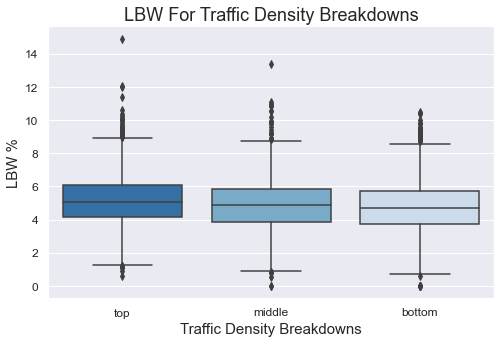

In [82]:
#plot graph
f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.boxplot(x=df18['traffic_breakdown'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("LBW For Traffic Density Breakdowns",fontsize=18)
bx.set_xlabel("Traffic Density Breakdowns",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

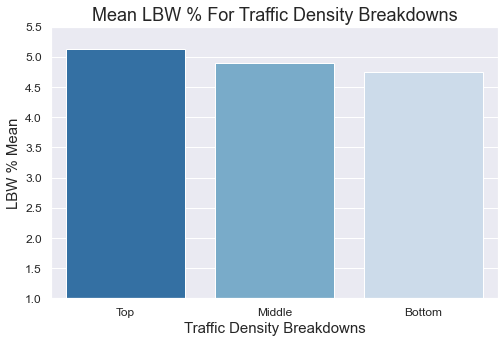

In [83]:
#plot graph
x = ['Top', 'Middle', 'Bottom']
y = [t_3.mean(), t_2.mean(), t_1.mean()]

f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.barplot(x=x,y=y, palette = 'Blues_r')
bx.axes.set_title("Mean LBW % For Traffic Density Breakdowns",fontsize=18)
bx.set_xlabel("Traffic Density Breakdowns",fontsize=15)
bx.set_ylabel("LBW % Mean",fontsize=15)
bx.tick_params(labelsize=12)
bx.set(ylim=(1, 5.5));

The higher amount of traffic the higher the median and mean LBW percentages for those census tracts are. 
This seems to indicate that the higher a census tracts' traffic values are the higher the LBW percentages.

### Cleanup Sites

The column representing cleanup sites is further explored as studies have indicated that pregnant women living near cleanup sites have an increased chance of having a low birth weight male [(Study).](https://pubmed.ncbi.nlm.nih.gov/12896858/) Hazard substances can be present as sites undergo cleanup actions leading to adverse effects. 

In [22]:
df18['cleanup_sites'].describe()

count    7812.000000
mean        8.207610
std        16.109321
min         0.000000
25%         0.000000
50%         2.000000
75%        10.200000
max       323.750000
Name: cleanup_sites, dtype: float64

**Statistical Tests**

In [23]:
#create groups
cs_1 = df18[df18['cleanup_sites'] <= 8.207610]['lbw']
cs_2 = df18[df18['cleanup_sites'] > 8.207610]['lbw']

In [24]:
stats.ttest_ind(cs_1, cs_2)

Ttest_indResult(statistic=-4.670308153894904, pvalue=3.0577372477978107e-06)

A statistical difference is found between the two groups. These are added to the data and further explored with visualizations below.

In [25]:
#create groups
conditions = [(df18['cleanup_sites'] <= 8.207610),
             (df18['cleanup_sites'] > 8.207610)]

choice = [('bottom'), ('top')]

df18['cleanup_sites_breakdown'] = np.select(conditions, choice)

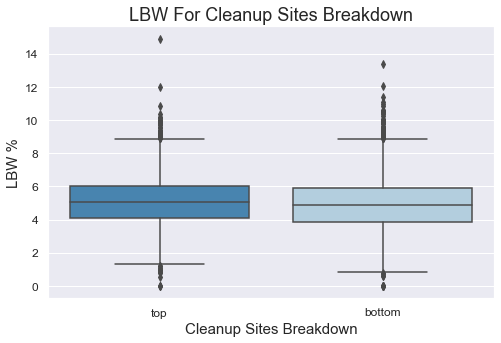

In [85]:
#plot graph
f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.boxplot(x=df18['cleanup_sites_breakdown'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("LBW For Cleanup Sites Breakdown",fontsize=18)
bx.set_xlabel("Cleanup Sites Breakdown",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

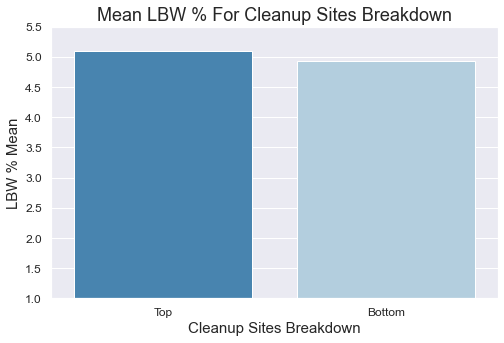

In [86]:
#plot graph
x = ['Top', 'Bottom']
y = [cs_2.mean(), cs_1.mean()]

f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.barplot(x=x,y=y, palette = 'Blues_r')
bx.axes.set_title("Mean LBW % For Cleanup Sites Breakdown",fontsize=18)
bx.set_xlabel("Cleanup Sites Breakdown",fontsize=15)
bx.set_ylabel("LBW % Mean",fontsize=15)
bx.tick_params(labelsize=12)
bx.set(ylim=(1, 5.5));

The higher amount of cleanup sites the higher the median and mean LBW percentages for those census tracts are. 
This seems to indicate that the higher a census tracts' cleanup sites values are the higher the LBW percentages.

## Population Characteristics Column

Individual columns related to population characteristics are explored and analyzed, especially those shown to be linked with low birth weights.

### Education

The education column is further explored as women with less education have been linked to an increased risk of low birth weight infants [(Study).](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3349660/) The education column measures the percent of population over the age of 25 in the census tract with less than a high school education. Oftentimes, education and exposure to both indoor and outdoor pollution has an inverse relationship. Studies have indicated that people lacking high school education seem to have a higher risk of mortality associated with particulate air pollution that people who have obtained a high school education [(Study).](https://pubmed.ncbi.nlm.nih.gov/12959828/)

In [28]:
df18['education'].describe()

count    7812.000000
mean       19.171024
std        15.931032
min         0.000000
25%         6.400000
50%        14.200000
75%        28.625000
max        80.000000
Name: education, dtype: float64

**Statistical Tests**

In [29]:
#create groups
e_1 = df18[df18['education'] <= 6.400000]['lbw']
e_2 = df18[(df18['education'] > 6.400000) & (df18['education'] <= 14.200000)]['lbw']
e_3 = df18[(df18['education'] > 14.200000) & (df18['education'] <= 28.625000)]['lbw']
e_4 = df18[df18['education'] > 28.625000]['lbw']

In [30]:
stats.ttest_ind(e_1, e_2)

Ttest_indResult(statistic=-11.12589194547635, pvalue=2.486741187689697e-28)

In [31]:
stats.ttest_ind(e_2, e_3)

Ttest_indResult(statistic=-11.346655554731708, pvalue=2.2067952948075008e-29)

In [32]:
stats.ttest_ind(e_3, e_4)

Ttest_indResult(statistic=-4.815370379610408, pvalue=1.5251013761641568e-06)

There is a statistical difference found between the four groups. These are added to the data set and visualizations are created to further explore them.

In [33]:
#create groups
conditions = [(df18['education'] <= 6.400000),
             ((df18['education'] > 6.400000) & (df18['education'] <= 14.200000)), 
             ((df18['education'] > 14.200000) & (df18['education'] <= 28.625000)), 
             (df18['education'] > 28.625000)]

choice = [('bottom'), ('lower_middle'), ('upper_middle'), ('top')]

df18['education_breakdown'] = np.select(conditions, choice)

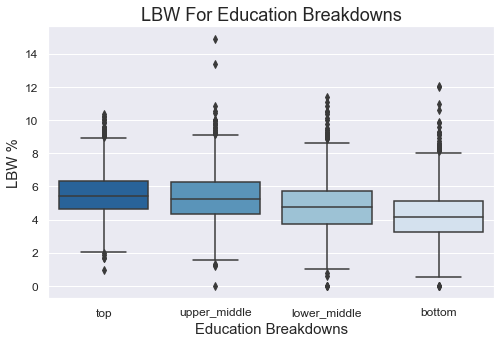

In [87]:
#plot graph
f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.boxplot(x=df18['education_breakdown'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("LBW For Education Breakdowns",fontsize=18)
bx.set_xlabel("Education Breakdowns",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

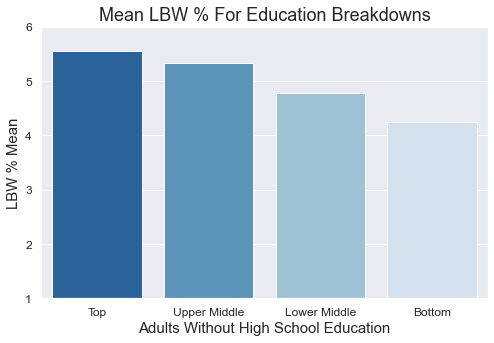

In [88]:
#plot graph
x = ['Top', 'Upper Middle', 'Lower Middle', 'Bottom']
y = [e_4.mean(), e_3.mean(), e_2.mean(), e_1.mean()]

f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.barplot(x=x,y=y, palette = 'Blues_r')
bx.axes.set_title("Mean LBW % For Education Breakdowns",fontsize=18)
bx.set_xlabel("Adults Without High School Education",fontsize=15)
bx.set_ylabel("LBW % Mean",fontsize=15)
bx.tick_params(labelsize=12)
bx.set(ylim=(1, 6));

The higher amount adults without a high school education the higher the median and mean LBW percentages for those census tracts are. This seems to indicate that the higher amount adults without a high school education values are the higher the LBW percentages.

### Ethnicity

Certain ethinicities have been shown to have an increase risk for LBWs [(Source).](https://www.marchofdimes.org/peristats/Peristats.aspx) The ethnicity breakdown for the census tract population provided in the data is further explored. 

#### Hispanic

In [36]:
df18['hispanic'].describe()

count    7812.000000
mean       36.924232
std        26.277914
min         1.300000
25%        14.500000
50%        29.300000
75%        56.300000
max        99.000000
Name: hispanic, dtype: float64

**Statistical Tests**

In [37]:
#create groups
h_1 = df18[df18['hispanic'] <= 29.300000]['lbw']
h_2 = df18[df18['hispanic'] > 29.300000]['lbw']

In [38]:
stats.ttest_ind(h_1, h_2)

Ttest_indResult(statistic=-23.798262528057492, pvalue=6.479979907059792e-121)

A statistical difference is found between the two groups. These are added to the data and visualized with graphs below.

In [39]:
#create groups
conditions = [(df18['hispanic'] <= 29.300000),
             (df18['hispanic'] > 29.300000)]

choice = [('Less'), ('More')]

df18['hispanic_breakdown'] = np.select(conditions, choice)

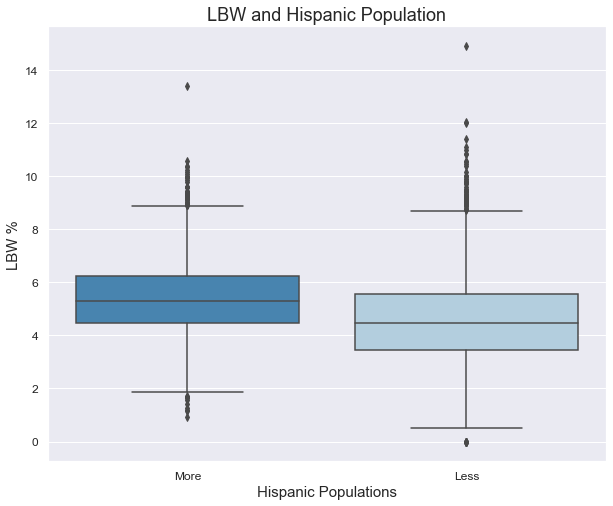

In [89]:
#plot graph
f, axes = plt.subplots(1, figsize=(10,8))
bx = sns.boxplot(x=df18['hispanic_breakdown'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("LBW and Hispanic Population",fontsize=18)
bx.set_xlabel("Hispanic Populations",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

The populations with "more" hispanics have a higher median LBW percentage.

#### Caucasian (White)

In [42]:
df18['white'].describe()

count    7812.000000
mean       40.986943
std        26.725039
min         0.200000
25%        16.200000
50%        40.800000
75%        64.900000
max        92.600000
Name: white, dtype: float64

**Statistical Tests**

In [43]:
w_1 = df18[df18['white'] <= 40.800000]['lbw']
w_2 = df18[df18['white'] > 40.800000]['lbw']

In [44]:
stats.ttest_ind(w_1, w_2)

Ttest_indResult(statistic=35.76369602137599, pvalue=1.479632622731183e-259)

A statistical difference is present between the two groups. These are added to the data set and visualized below.

In [45]:
#create groups
conditions = [(df18['white'] <= 40.800000),
             (df18['white'] > 40.800000)]

choice = [('Less'), ('More')]

df18['white_breakdown'] = np.select(conditions, choice)

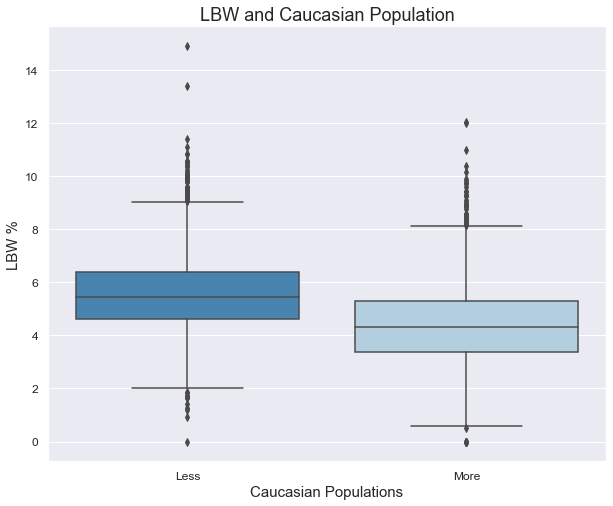

In [90]:
#plot graphs
f, axes = plt.subplots(1, figsize=(10,8))
bx = sns.boxplot(x=df18['white_breakdown'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("LBW and Caucasian Population",fontsize=18)
bx.set_xlabel("Caucasian Populations",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

The populations with "more" Caucasians have a lower median LBW percentage.

#### African American

In [48]:
df18['african_american'].describe()

count    7812.000000
mean        5.836265
std         9.315121
min         0.000000
25%         1.100000
50%         2.600000
75%         6.200000
max        89.800000
Name: african_american, dtype: float64

**Statistical Tests**

In [49]:
afa_1 = df18[df18['african_american'] <= 2.600000]['lbw']
afa_2 = df18[df18['african_american'] > 2.600000]['lbw']

In [50]:
stats.ttest_ind(afa_1, afa_2)

Ttest_indResult(statistic=-26.520805379022548, pvalue=1.801805798983874e-148)

A statistical difference is found between the two. The groups are added to the data and visualized below.

In [51]:
#create groups
conditions = [(df18['african_american'] <= 2.600000),
             (df18['african_american'] > 2.600000)]

choice = [('Less'), ('More')]

df18['african_american_breakdown'] = np.select(conditions, choice)

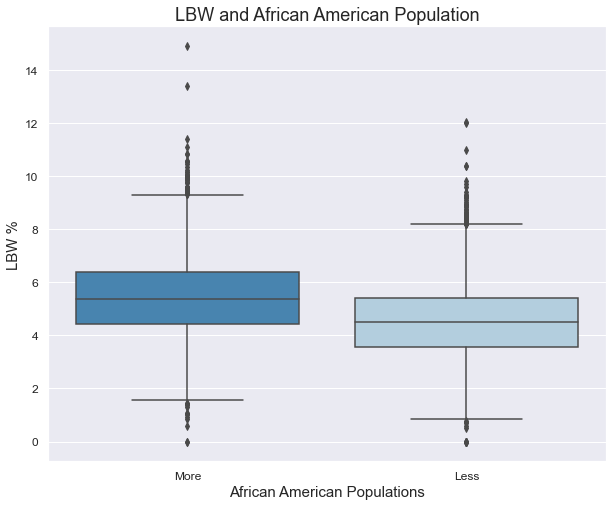

In [91]:
#plot graph
f, axes = plt.subplots(1, figsize=(10,8))
bx = sns.boxplot(x=df18['african_american_breakdown'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("LBW and African American Population",fontsize=18)
bx.set_xlabel("African American Populations",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

The populations with "more" African Americans have a higher median LBW percentage.

#### Native American 

In [54]:
df18['native_american'].describe()

count    7812.000000
mean        0.426267
std         0.902724
min         0.000000
25%         0.100000
50%         0.300000
75%         0.500000
max        37.500000
Name: native_american, dtype: float64

**Statistical Tests**

In [55]:
na_1 = df18[df18['native_american'] <= 0.500000]['lbw']
na_2 = df18[df18['native_american'] > 0.500000]['lbw']

In [56]:
stats.ttest_ind(na_1, na_2)

Ttest_indResult(statistic=1.2005548235807844, pvalue=0.22996034592348158)

Since there is such a small amount of native americans in most populaitons a t test was run between populations with more native americans vs less and no statistical difference was found. 


#### Asian American

In [57]:
df18['asian_american'].describe()

count    7812.000000
mean       12.991116
std        14.822385
min         0.000000
25%         3.200000
50%         7.600000
75%        16.500000
max        89.900000
Name: asian_american, dtype: float64

**Statistical Test**

In [58]:
#create groups
asa_1 = df18[df18['asian_american'] <= 16.500000]['lbw']
asa_2 = df18[df18['asian_american'] > 16.500000]['lbw']

In [59]:
stats.ttest_ind(asa_1, asa_2)

Ttest_indResult(statistic=-6.397196562351637, pvalue=1.6737239369312004e-10)

A statistical difference is found between the groups. They are added to the data and visualized below.

In [60]:
#create groups
conditions = [(df18['asian_american'] <= 16.500000),
             (df18['asian_american'] > 16.500000)]

choice = [('Less'), ('More')]

df18['asian_american_breakdown'] = np.select(conditions, choice)

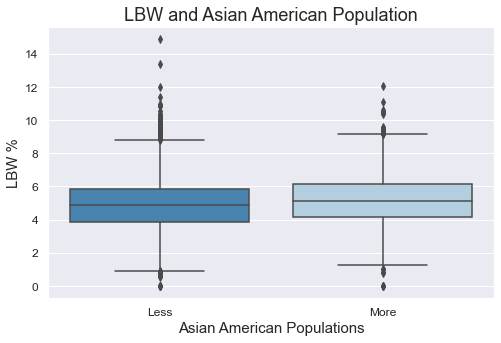

In [93]:
#plot graph
f, axes = plt.subplots(1, figsize=(8,5))
bx = sns.boxplot(x=df18['asian_american_breakdown'],y=df18['lbw'], palette = 'Blues_r')
bx.axes.set_title("LBW and Asian American Population",fontsize=18)
bx.set_xlabel("Asian American Populations",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

The populations with "more" Asian Americans have a higher median LBW percentage.

#### Ethnicity Mean Bar Graph

A graph comparing the breakdowns of Ethnicities' LBW means is plotted below.


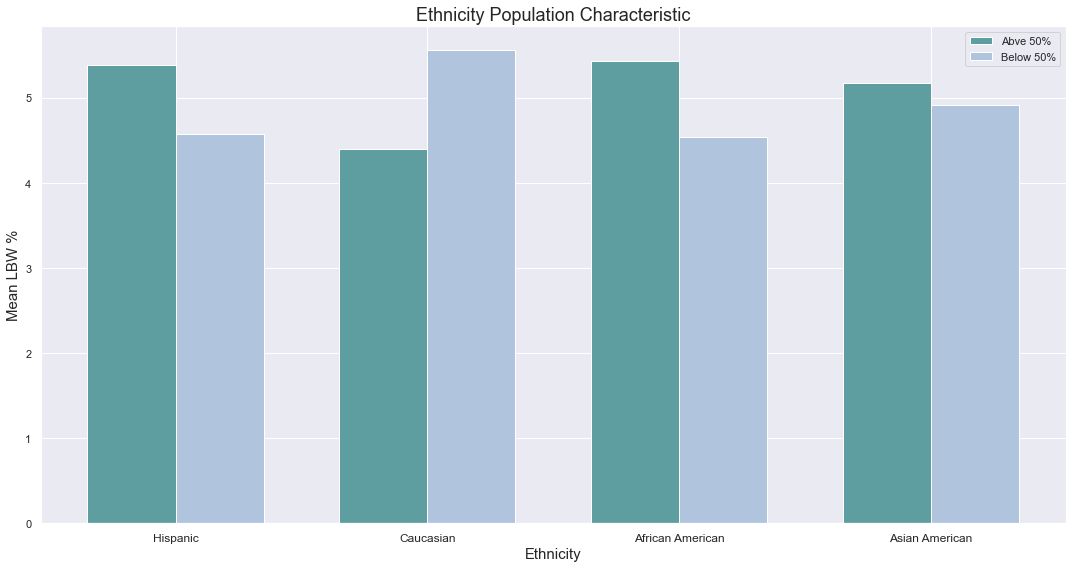

In [70]:
x_values = ['Hispanic', 'Caucasian', 'African American', 'Asian American']
y1_values = [h_2.mean(), w_2.mean(), afa_2.mean(), asa_2.mean()]
y2_values = [h_1.mean(), w_1.mean(), afa_1.mean(), asa_1.mean()]

x = np.arange(len(x_values))
width = 0.35  

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, y1_values, width, label='Abve 50%', color = 'cadetblue')
rects2 = ax.bar(x + width/2, y2_values, width, label='Below 50%', color = 'lightsteelblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Ethnicity Population Characteristic', fontsize=18)
ax.set_xlabel ('Ethnicity', fontsize=15)
ax.set_ylabel('Mean LBW %', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(x_values, fontsize=12)
ax.legend()


fig.tight_layout()

plt.show()

bx.axes.set_title("Mean LBW % and Smoking Population",fontsize=18)
bx.set_xlabel("Smoking Population",fontsize=15)
bx.set_ylabel("Mean LBW %",fontsize=15)
bx.tick_params(labelsize=14)
bx.set(ylim=(1, 5.5));

The graph shows that populations with "more" Hispanics, African Americans, and Asian Americans have a higher mean LBW percentage. On the contrary, populations with "more" Caucasians have a lower mean LBW%.

## Smoking

LBW newborns are seen more often among smokers when compared to non-smokers [(Study).](https://pubmed.ncbi.nlm.nih.gov/14976791). Since smoking amongst the population is not in the original data smoking is added at the county level using data obtained from the [CHIS](https://ask.chis.ucla.edu/ask/SitePages/AskChisLogin.aspx?ReturnUrl=%2fAskCHIS%2ftools%2f_layouts%2fAuthenticate.aspx%3fSource%3d%252FAskCHIS%252Ftools%252F%255Flayouts%252FAskChisTool%252Fhome%252Easpx&Source=%2FAskCHIS%2Ftools%2F%5Flayouts%2FAskChisTool%2Fhome%2Easpx). 

In [63]:
#create smoking prevalence column from data
conditions = [(df18['california_county'] == 'Alameda '), (df18['california_county'] == 'Amador '), (df18['california_county'] == 'Butte '), 
             (df18['california_county'] == 'Calaveras '), (df18['california_county'] == 'Colusa '), (df18['california_county'] == 'Contra Costa'),
             (df18['california_county'] == 'Del Norte'), 
             (df18['california_county'] == 'El Dorado'), (df18['california_county'] == 'Fresno '), (df18['california_county'] == 'Glenn '), 
             (df18['california_county'] == 'Humboldt '), (df18['california_county'] == 'Imperial '), (df18['california_county'] == 'Inyo '), 
             (df18['california_county'] == 'Kern '), (df18['california_county'] == 'Kings '), (df18['california_county'] == 'Lake '), 
             (df18['california_county'] == 'Lassen '), (df18['california_county'] == 'Los Angeles'), (df18['california_county'] == 'Madera '),
             (df18['california_county'] == 'Marin '), (df18['california_county'] == 'Mariposa '), (df18['california_county'] == 'Mendocino '), 
             (df18['california_county'] == 'Merced '), (df18['california_county'] == 'Mono '), (df18['california_county'] == 'Monterey '), 
             (df18['california_county'] == 'Napa '), (df18['california_county'] == 'Nevada '), (df18['california_county'] == 'Orange '), 
             (df18['california_county'] == 'Placer '), (df18['california_county'] == 'Plumas '), (df18['california_county'] == 'Riverside '), 
             (df18['california_county'] == 'Sacramento '), (df18['california_county'] == 'San Benito'), (df18['california_county'] == 'San Bernardino'),
             (df18['california_county'] == 'San Diego'), (df18['california_county'] == 'San Francisco'), (df18['california_county'] == 'San Joaquin'), 
             (df18['california_county'] == 'San Luis Obispo'), (df18['california_county'] == 'San Mateo'), (df18['california_county'] == 'Santa Barbara'), 
             (df18['california_county'] == 'Santa Clara'), (df18['california_county'] == 'Santa Cruz'), (df18['california_county'] == 'Shasta '), 
             (df18['california_county'] == 'Sierra '), (df18['california_county'] == 'Siskiyou '), (df18['california_county'] == 'Solano '), 
             (df18['california_county'] == 'Sonoma '), (df18['california_county'] == 'Stanislaus '), (df18['california_county'] == 'Sutter '), 
             (df18['california_county'] == 'Tehama '), (df18['california_county'] == 'Trinity '), (df18['california_county'] == 'Tulare '), 
             (df18['california_county'] == 'Tuolumne '), (df18['california_county'] == 'Ventura '), (df18['california_county'] == 'Yolo '), 
             (df18['california_county'] == 'Yuba ')]

choice = [(9.9), (18), (19.3), 
          (17.1), (14.6), (10.8), 
         (24.4), 
         (10.6), (10.6), (15.1), 
         (15.2), (12.7), (19.5), 
         (17.8), (15.0), (23.3), 
         (23.4), (10.2), (15.8), 
         (7.5), (18.0), (16.2), 
         (15.4), (17.4), (11.7), 
         (10), (19.3), (9.1), 
         (8.2), (19.7), (12.1), 
         (10.6), (13.8), (13.5), 
         (11), (12.2), (14.6), 
         (11.5), (8.4), (11.2), 
         (6.7), (10.1), (21.7), 
         (20.3), (20.5), (13.2), 
         (10), (13.5), (16.0), 
         (15.2), (21.7), (11.8), 
         (18), (8.2), (7.5), 
         (20)]

df18['smoking_prevalence'] = np.select(conditions, choice)

In [64]:
df18['smoking_prevalence'].describe()

count    7812.000000
mean       10.974488
std         2.529863
min         6.700000
25%        10.100000
50%        10.200000
75%        11.800000
max        24.400000
Name: smoking_prevalence, dtype: float64

**Statistical Tests**

In [65]:
sp_1 = df18[df18['smoking_prevalence'] <= 10.200000]['lbw']
sp_2 = df18[df18['smoking_prevalence'] > 10.200000]['lbw']

In [66]:
stats.ttest_ind(sp_1, sp_2)

Ttest_indResult(statistic=2.618794930849563, pvalue=0.008841143103873465)

A statistcal difference is found between the two groups. A graph for further visualization is created below. 

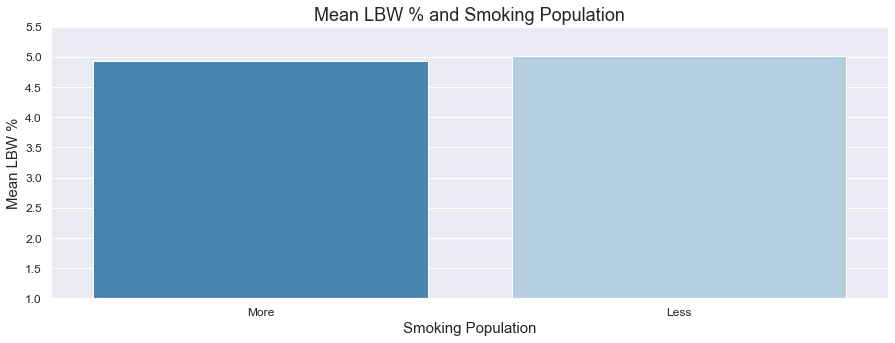

In [94]:
x = ['More', 'Less']
y = [sp_2.mean(), sp_1.mean()]

#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.barplot(x=x,y=y, palette = 'Blues_r')
bx.axes.set_title("Mean LBW % and Smoking Population",fontsize=18)
bx.set_xlabel("Smoking Population",fontsize=15)
bx.set_ylabel("Mean LBW %",fontsize=15)
bx.tick_params(labelsize=12)
bx.set(ylim=(1, 5.5));

The graph shows us that the mean LBW percentage for the group with more smoking actually has a lower mean LBW percent the the group with less smoking. 

## Save Updated Data

In [69]:
df18.to_csv('data/merged/post_EDA_and_FE_df18')